# Project 9-2: Analyze retail sales over time

## The data for this project is in: scanner_data.csv

In [1]:
# Import needed modules

# Import pandas and create the alias pd
import pandas as pd

# Import seaborn and create the alias sbn
import seaborn as sbn

## Tasks

In [2]:
# 1
# Read the data from the csv file, scanner_data.csv

data = pd.read_csv('scanner_data.csv')


In [3]:
# Task 2, run info() and display the first five rows

data.info(memory_usage = 'deep')

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 28.8 MB


,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [4]:
# Task 3, Drop the 2 index columns and the SKU column.

data.drop(columns = ['Unnamed: 0', 'Transaction_ID', 'SKU'], inplace = True)


In [5]:
data_test = data.query('Customer_ID == 37')

data_test.head()

,Date,Customer_ID,SKU_Category,Quantity,Sales_Amount
10222,01/02/2016,37,U5F,1.0,2.49


In [6]:
# Task 4, Convert the Date column to the dateTime data type.

data.Date = pd.to_datetime(data.Date, format = "%d/%m/%Y")

data.head()


,Date,Customer_ID,SKU_Category,Quantity,Sales_Amount
0,2016-01-02,2547,X52,1.0,3.13
1,2016-01-02,822,2ML,1.0,5.46
2,2016-01-02,3686,0H2,1.0,6.35
3,2016-01-02,3719,0H2,1.0,5.59
4,2016-01-02,9200,0H2,1.0,6.88


In [7]:
data_Customer = data.query('Customer_ID == 37')

data_Customer.head()

,Date,Customer_ID,SKU_Category,Quantity,Sales_Amount
10222,2016-02-01,37,U5F,1.0,2.49


In [8]:
# Task 5, Group the data by Date, Customer_ID, and SKU_Category columns
#         and calculate the sum of the Quantity and Sales_Amount columns.
#         Then display the first five rows.

data_grouped = data.groupby(['Date', 'Customer_ID', 'SKU_Category']).sum()

data_grouped.head()


Quantity  Sales_Amount
Date       Customer_ID SKU_Category                        
2016-01-02 3           LPF                2.0          8.16
                       TW8                2.0          2.76
           178         Q4N                1.0         34.06
                       R6E                1.0         24.93
           195         8H8                1.0          6.75

In [9]:
# Task 6, Resample the date to a monthly frequency and save the results to a new DataFrame.

data_monthly = data_grouped.resample(rule = 'M', level = 0).sum()


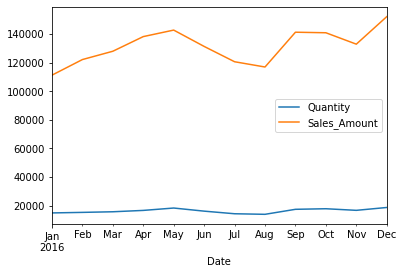

In [10]:
# Task 7, Plot the monthly Quantity and Sales_Amount column by Date in a Pandas line plot.

data_monthly.plot();

In [11]:
# Task 8, Resample the date to a quarterly frequency and save the results to a new DataFrame.

data_quarterly = data_grouped.resample(rule = 'Q', level = 0).sum()

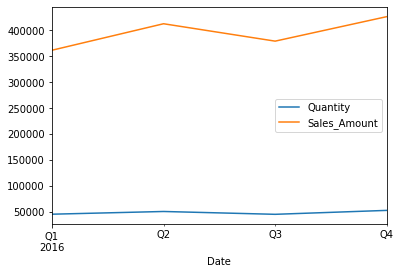

In [12]:
# Task 9, Plot the quarterly Quantity and Sales_Amount column by Date in a Pandas line plot.

data_quarterly.plot();

In [13]:
# Task 10, Add the running total for the Sales_Amount column to the DataFrame that contains
#          the monthly data.

data_monthly['SalesRunning'] = data_monthly.Sales_Amount.expanding().sum()


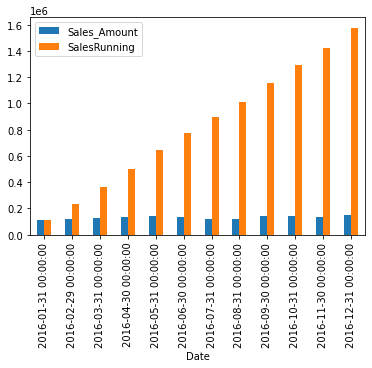

In [14]:
# Task 11, Plot the running total and Sales_Amount column together in a Pandas bar plot.

data_monthly.plot(y = ['Sales_Amount', 'SalesRunning'], kind = 'bar');